In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [3]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [4]:
# 显示训练图像的第一张
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
img = x_train[0]
label = t_train[0]

print(label)        # 5
print(img.shape)    # (784,)
img = img.reshape(28, 28)  # 把图像的形状变成原来的尺寸
print(img.shape)    # (28, 28)

img_show(img)    # 会打开第三方应用查看图片

5
(784,)
(28, 28)


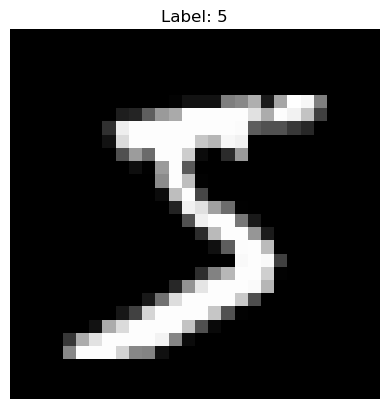

标签: 5
图像形状: (28, 28)


In [5]:
# Plot第一张图像
img = x_train[0].reshape(28, 28)
label = t_train[0]

plt.imshow(img, cmap='gray')
plt.title(f'Label: {label}')
plt.axis('off')  # 不显示坐标轴
plt.show()

print(f"标签: {label}")
print(f"图像形状: {img.shape}")

### 3.6.2 神经网络的推理处理

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [7]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open('dataset/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

In [8]:
# 利用测试数据预测准确度
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    pos = np.argmax(y)
    if pos == t[i]:
        accuracy_cnt += 1

print(f'Accuracy: {accuracy_cnt / len(x):.2%}')

Accuracy: 93.52%


In [9]:
# 查看测试数据x 和神经网络参数的信息
print(x.shape)
print(network['W1'].shape)
print(network['W2'].shape)
print(network['W3'].shape)
print(network['b1'].shape)
print(network['b2'].shape)
print(network['b3'].shape)

(10000, 784)
(784, 50)
(50, 100)
(100, 10)
(50,)
(100,)
(10,)


In [10]:
# 查看神经网络预测第一条测试数据的输出结果，以及对应的标签信息
y = predict(network, x[0])
print(y)
print(np.max(y))
print(np.argmax(y))
print(t[0])

[8.4412408e-05 2.6350631e-06 7.1549317e-04 1.2586251e-03 1.1727932e-06
 4.4990808e-05 1.6269318e-08 9.9706501e-01 9.3744620e-06 8.1831042e-04]
0.997065
7
7


In [19]:
# 创建示例矩阵
A = np.random.rand(3, 4)  # 3x4矩阵
B = np.random.rand(4, 5)  # 4x5矩阵

print("矩阵A形状:", A.shape)
print("矩阵B形状:", B.shape)

# 矩阵乘法
C = np.dot(A, B)  # 或者 A @ B
print("乘积结果形状:", C.shape)  # 输出: (3, 5)
C

矩阵A形状: (3, 4)
矩阵B形状: (4, 5)
乘积结果形状: (3, 5)


array([[0.46329175, 1.13675541, 0.84376044, 0.44877626, 1.33521286],
       [0.27316607, 0.72499878, 0.72451333, 0.34556468, 1.07053419],
       [0.38192778, 1.14255298, 0.88564183, 0.60164085, 1.54165497]])

### 3.6.3 批处理
批处理一次性计算**大型数组**要比分开逐步计算**各个小型数组**速度更快

In [30]:
# 理解axis=0 和 1的不同处理方式
# axis=0 按行操作，比较不同行里 相同列的数据 - 跨样本操作
# axis=1 按列操作，比较同一行里 不同列的数据 - 单个样本内部操作
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
print(x.ndim)
print(x.shape)
print(np.max(x, axis=0))
print(np.max(x, axis=1))
print(np.argmax(x, axis=0))
print(np.argmax(x, axis=1))
print(np.sum(x))
print(np.sum(x, axis=0))
print(np.sum(x, axis=1))

2
(4, 3)
[0.8 0.8 0.6]
[0.8 0.6 0.5 0.8]
[3 0 1]
[1 2 1 0]
4.0
[1.4 1.5 1.1]
[1. 1. 1. 1.]


In [31]:
# 理解Numpy数组比较方式
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)
np.sum(y==t)

[ True  True False  True]


np.int64(3)

In [28]:
# 利用测试数据预测准确度
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    pos = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(pos == t[i:i+batch_size])

print(f'Accuracy: {accuracy_cnt / len(x):.2%}')

Accuracy: 93.52%
